In [111]:
import pandas as pd
import matplotlib.pyplot as plt

data from https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD
data added to google sheets

In [191]:
ppp_df = pd.read_csv('https://docs.google.com/spreadsheets/d/15UBj70XkwGS46NCrflW8E97k03p_9WR_wIDMjNxV9cU/export?gid=0&format=csv')


In [192]:
ppp_df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
Length: 65, dtype: object

In [193]:
ppp_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [194]:
ppp_df['2020'].isna().sum()

29

In [195]:
ppp_df['2020'] = ppp_df['2020'].fillna(ppp_df['2019'])

In [196]:
ppp_df['2020'].isna().sum()

26

In [197]:
ppp_df['2020'] = ppp_df['2020'].fillna(ppp_df['2020'].mean())

In [199]:
ppp_df = ppp_df[['Country Name', '2020']]

In [200]:
ppp_df =ppp_df.rename({'Country Name': 'Country', '2020': 'PPP'}, axis=1) 

In [201]:
ppp_df.head(20)

,Country,PPP
0,Aruba,20502.901986
1,Africa Eastern and Southern,3677.111255
2,Afghanistan,2077.874554
3,Africa Western and Central,4240.534782
4,Angola,6443.032680
5,Albania,13899.933981
6,Andorra,20502.901986
7,Arab World,14067.950841
8,United Arab Emirates,66746.634941
9,Argentina,20762.991679


In [202]:
ppp_df.shape[0]

266

data from https://www.kaggle.com/prasertk/netflix-subscription-price-in-different-countries
data added to Google sheets

In [203]:
netflix_df = pd.read_csv('https://docs.google.com/spreadsheets/d/10j8_in7vMRGcYISVNbQ6d3yY6iCunai3lZY3K5XiV74/export?gid=0&format=csv')


In [204]:
netflix_df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


# Построить график корреляции между средним доходом (PPP) и ценой подписки

In [206]:
netflix_df = netflix_df.merge(ppp_df, how='left', on='Country')

In [207]:
netflix_df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),PPP
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,20762.991679
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,52397.387048
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,55648.874565
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,52626.581638
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,8272.409814


In [208]:
netflix_df = netflix_df.drop(columns='Country_code')

In [209]:
for_corr_df = netflix_df[['Cost Per Month - Basic ($)','Cost Per Month - Standard ($)', \
                          'Cost Per Month - Premium ($)', 'PPP']]

In [210]:
for_corr_df.corr(method ='pearson')

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),PPP
Cost Per Month - Basic ($),1.000000,0.898535,0.820914,0.483161
Cost Per Month - Standard ($),0.898535,1.000000,0.978768,0.543857
Cost Per Month - Premium ($),0.820914,0.978768,1.000000,0.584149
PPP,0.483161,0.543857,0.584149,1.000000


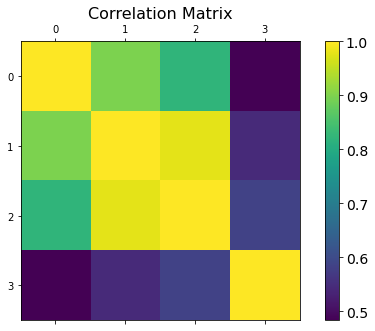

In [211]:
f = plt.figure(figsize=(9, 5))
plt.matshow(for_corr_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

корреляция средняя

# Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны. 

In [212]:

data = pd.read_csv('https://docs.google.com/spreadsheets/d/1Tc_aiVXrCrMNQFFDMiJGQ3Gm35szGLps_FIsonCe38Q/export?gid=481487463&format=csv')


In [213]:
data

,Country,Mobile,Basic,Standard,Premium,Unnamed: 5
0,Argentina,NaN,379.00,639.00,939.00,ARS
1,Australia,NaN,10.99,16.99,22.99,AUS
2,Austria,NaN,7.99,12.99,17.99,EUR
3,Belgium,NaN,8.99,13.49,17.99,EUR
4,Bolivia,NaN,7.99,10.99,13.99,USD
...,...,...,...,...,...,...
60,Ukraine,NaN,4.99,7.49,9.99,EUR
61,United Kingdom,NaN,5.99,9.99,13.99,GBP
62,United States,NaN,9.99,15.49,19.99,USD
63,Uruguay,NaN,8.99,12.99,15.99,USD


In [214]:
data = data.rename({'Unnamed: 5': 'Currency'}, axis=1) 

средняя цена подписки

In [215]:
data.groupby('Currency').agg({'Basic': 'mean', 'Standard': 'mean', 'Premium': 'mean'})

,Basic,Standard,Premium
Currency,,,
ARS,379.000000,639.0000,939.000000
AUS,10.990000,16.9900,22.990000
BRL,25.900000,39.9000,55.900000
CAD,9.990000,16.4900,20.990000
CHF,11.900000,18.9000,24.900000
CLP,5940.000000,8320.0000,10700.000000
COP,16900.000000,26900.0000,38900.000000
CZK,199.000000,259.0000,319.000000
DKK,79.000000,99.0000,129.000000


# Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента

In [186]:
conti = pd.read_csv('https://docs.google.com/spreadsheets/d/1Xjsfrd8eRauHsictZgCBoGDtiDy_rIRyhVNYTFNVciU/export?gid=0&format=csv')

In [187]:
conti.head()

,Entity,Code,Year,World Region
0,Afghanistan,AFG,2017,South Asia
1,Albania,ALB,2017,Europe and Central Asia
2,Algeria,DZA,2017,Middle East and North Africa
3,American Samoa,ASM,2017,East Asia and Pacific
4,Andorra,AND,2017,Europe and Central Asia


In [188]:
conti = conti[['Entity', 'World Region', 'Code']]

In [189]:
conti = conti.rename({'Entity': 'Country', 'World Region':'Region', 'Code': 'Country_code'}, axis=1)

In [241]:
netflix_df.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),PPP,Region,Country_code
0,Argentina,4760,3154,1606,3.74,6.30,9.26,20762.991679,Latin America and Caribbean,ARG
1,Australia,6114,4050,2064,7.84,12.12,16.39,52397.387048,East Asia and Pacific,AUS
2,Austria,5640,3779,1861,9.03,14.67,20.32,55648.874565,Europe and Central Asia,AUT
3,Belgium,4990,3374,1616,10.16,15.24,20.32,52626.581638,Europe and Central Asia,BEL
4,Bolivia,4991,3155,1836,7.99,10.99,13.99,8272.409814,Latin America and Caribbean,BOL


In [216]:
netflix_df = netflix_df.merge(conti, on='Country', how='left')

In [217]:
netflix_df

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),PPP,Region,Country_code
0,Argentina,4760,3154,1606,3.74,6.30,9.26,20762.991679,Latin America and Caribbean,ARG
1,Australia,6114,4050,2064,7.84,12.12,16.39,52397.387048,East Asia and Pacific,AUS
2,Austria,5640,3779,1861,9.03,14.67,20.32,55648.874565,Europe and Central Asia,AUT
3,Belgium,4990,3374,1616,10.16,15.24,20.32,52626.581638,Europe and Central Asia,BEL
4,Bolivia,4991,3155,1836,7.99,10.99,13.99,8272.409814,Latin America and Caribbean,BOL
...,...,...,...,...,...,...,...,...,...,...
60,Ukraine,5336,3261,2075,5.64,8.46,11.29,13056.702075,Europe and Central Asia,UKR
61,United Kingdom,6643,4551,2092,7.91,13.20,18.48,45852.688886,Europe and Central Asia,GBR
62,United States,5818,3826,1992,8.99,13.99,17.99,63413.513858,North America,USA
63,Uruguay,4989,3154,1835,8.99,12.99,15.99,22785.199916,Latin America and Caribbean,URY


In [218]:
netflix_df[['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)',\
            'Cost Per Month - Premium ($)', 'Region']].groupby('Region').mean()


,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Region,,,
East Asia and Pacific,8.337000,11.294000,14.270000
Europe and Central Asia,9.022857,13.010000,17.159143
Latin America and Caribbean,7.048571,10.113571,13.125714
Middle East and North Africa,10.560000,15.050000,19.540000
North America,8.450000,12.930000,16.510000
South Asia,2.640000,6.610000,8.600000
Sub-Saharan Africa,6.260000,10.050000,12.580000


# Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?


In [221]:
czechia_df = netflix_df[netflix_df['Country'] == 'Czechia'][['Country','Cost Per Month - Basic ($)',\
                                                             'Cost Per Month - Standard ($)',\
            'Cost Per Month - Premium ($)', 'PPP']]

In [223]:
czechia_df['Country'] = ['Czech Republic' for x in czechia_df['Country']]

In [225]:
czechia_df = czechia_df.merge(ppp_df, on='Country', how='left')

In [227]:
czechia_df['PPP'] = czechia_df['PPP_y']
czechia_df = czechia_df.drop({'PPP_x', 'PPP_y'}, axis=1)

In [232]:
czechia_df = czechia_df.rename({'Cost Per Month - Basic ($)':'Basic' ,\
                                'Cost Per Month - Standard ($)': 'Standard',\
                                'Cost Per Month - Premium ($)': 'Premium'}, axis=1)

In [234]:
def prop(tarrif, ppp):
    return round(tarrif * 12 / ppp * 100, 2)

In [239]:
czechia_df['Basic_prop, %'] = czechia_df.apply(lambda x: prop(x.Basic, x.PPP), axis=1)
czechia_df['Standard_prop, %'] = czechia_df.apply(lambda x: prop(x.Standard, x.PPP), axis=1)
czechia_df['Premium_prop, %'] = czechia_df.apply(lambda x: prop(x.Premium, x.PPP), axis=1)


In [240]:
czechia_df

,Country,Basic,Standard,Premium,PPP,Basic_prop,Standard_prop,Premium_prop,"Basic_prop, %","Standard_prop, %","Premium_prop, %"
0,Czech Republic,8.83,11.49,14.15,42049.185954,0.25,0.33,0.4,0.25,0.33,0.4


# Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?


In [242]:
standard_df = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1Tc_aiVXrCrMNQFFDMiJGQ3Gm35szGLps_FIsonCe38Q/export?gid=720312140&format=csv'
)

In [245]:
standard_df.sort_values(by='# of TV Shows', ascending=False)[['Country', '# of TV Shows']].head()

,Country,# of TV Shows
7,Czech Republic,5234.0
9,Slovakia,5055.0
10,Bulgaria,4819.0
6,Hungary,4802.0
20,United Kingdom,4551.0


# Какой процент среднего дохода россиянина будет составлять подписка Netflix?


In [246]:
russia_df = netflix_df[netflix_df['Country'] == 'Russia'][['Country','Cost Per Month - Basic ($)',\
                                                             'Cost Per Month - Standard ($)',\
            'Cost Per Month - Premium ($)', 'PPP']]

In [250]:
russia_df['Country'] = ['Russian Federation' for x in russia_df['Country']]

In [251]:
russia_df = russia_df.merge(ppp_df, on='Country', how='left')

In [253]:
russia_df['PPP'] = russia_df['PPP_y']
russia_df = russia_df.drop({'PPP_x', 'PPP_y'}, axis=1)

In [256]:
russia_df = russia_df.rename({'Cost Per Month - Basic ($)':'Basic' ,\
                                'Cost Per Month - Standard ($)': 'Standard',\
                                'Cost Per Month - Premium ($)': 'Premium'}, axis=1)

In [257]:
russia_df['Basic_prop, %'] = russia_df.apply(lambda x: prop(x.Basic, x.PPP), axis=1)
russia_df['Standard_prop, %'] = russia_df.apply(lambda x: prop(x.Standard, x.PPP), axis=1)
russia_df['Premium_prop, %'] = russia_df.apply(lambda x: prop(x.Premium, x.PPP), axis=1)

In [258]:
russia_df

,Country,Basic,Standard,Premium,PPP,"Basic_prop, %","Standard_prop, %","Premium_prop, %"
0,Russian Federation,8.13,10.84,13.56,28213.447838,0.35,0.46,0.58


# На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)


In [261]:
netflix_df

,Country,Total Library Size,No. of TV Shows,No. of Movies,Basic,Standard,Premium,PPP,Region,Country_code
0,Argentina,4760,3154,1606,3.74,6.30,9.26,20762.991679,Latin America and Caribbean,ARG
1,Australia,6114,4050,2064,7.84,12.12,16.39,52397.387048,East Asia and Pacific,AUS
2,Austria,5640,3779,1861,9.03,14.67,20.32,55648.874565,Europe and Central Asia,AUT
3,Belgium,4990,3374,1616,10.16,15.24,20.32,52626.581638,Europe and Central Asia,BEL
4,Bolivia,4991,3155,1836,7.99,10.99,13.99,8272.409814,Latin America and Caribbean,BOL
...,...,...,...,...,...,...,...,...,...,...
60,Ukraine,5336,3261,2075,5.64,8.46,11.29,13056.702075,Europe and Central Asia,UKR
61,United Kingdom,6643,4551,2092,7.91,13.20,18.48,45852.688886,Europe and Central Asia,GBR
62,United States,5818,3826,1992,8.99,13.99,17.99,63413.513858,North America,USA
63,Uruguay,4989,3154,1835,8.99,12.99,15.99,22785.199916,Latin America and Caribbean,URY


In [265]:
netflix_df = netflix_df.rename({'Cost Per Month - Basic ($)':'Basic' ,\
                                'Cost Per Month - Standard ($)': 'Standard',\
                                'Cost Per Month - Premium ($)': 'Premium', \
                               'Total Library Size': 'total_library_size'}, axis=1)

In [262]:
def CPT(tarrif, Library):
    return round(tarrif/Library)

In [266]:
netflix_df['Basic_CPT'] = netflix_df.apply(lambda x: prop(x.Basic, x.total_library_size), axis=1)
netflix_df['Standard_CPT'] = netflix_df.apply(lambda x: prop(x.Standard, x.total_library_size), axis=1)
netflix_df['Premium_CPT'] = netflix_df.apply(lambda x: prop(x.Premium, x.total_library_size), axis=1)

In [293]:
russia = netflix_df.sort_values(by=['Basic_CPT', 'Standard_CPT', 'Premium_CPT'], ascending=True)\
[['Country', 'Basic_CPT']].reset_index(drop=True)

In [294]:
russia.index  = russia.index + 1

In [295]:
russia[russia['Country'] == 'Russia'] \
.index[0]

26

# В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?


In [298]:
netflix_df['Basic'].min()

1.97

In [299]:
netflix_df[netflix_df['Basic'] == netflix_df['Basic'].min()]['Country']

59    Turkey
Name: Country, dtype: object

In [300]:
netflix_df[netflix_df['Standard'] == netflix_df['Standard'].min()]['Country']

59    Turkey
Name: Country, dtype: object

In [302]:
netflix_df['Premium'].min()

4.02

In [301]:
netflix_df[netflix_df['Premium'] == netflix_df['Premium'].min()]['Country']

59    Turkey
Name: Country, dtype: object